# Introduction

## steps

 - Load and understand data
 - Query dataset
 - Clear the dataset
 - Buld and train the ML model
 - Perform hyperparameter tuning
 - Create report

In [1]:
# Filter unecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import pandas and numpy
import pandas as pd

In [3]:
import numpy as np

In [4]:
np.random.seed(7)

# Read the data

In [5]:
data = pd.read_csv('titanic_train.csv')

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
528,529,0,3,"Salonen, Mr. Johan Werner",male,39.0,0,0,3101296,7.9250,NaN,S
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
357,358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0000,NaN,S
562,563,0,2,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.5000,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


In [9]:
data.shape

(891, 12)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
data['Survived'].unique()

array([0, 1], dtype=int64)

In [14]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [15]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [16]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [17]:
data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [18]:
data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [19]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

## Checking Distribution of the data

In [20]:
from collections import Counter

In [21]:
classes = Counter(data['Survived'].values)

In [22]:
classes.most_common()

[(0, 549), (1, 342)]

In [23]:
# 0 means died and 1 means survived 

In [24]:
class_dist = pd.DataFrame(classes.most_common(), columns=['Class', 'People'])

In [25]:
class_dist

,Class,People
0,0,549
1,1,342


In [26]:
import matplotlib.pyplot as plt

In [27]:
%matplotlib inline

In [28]:
plt.style.use('ggplot')

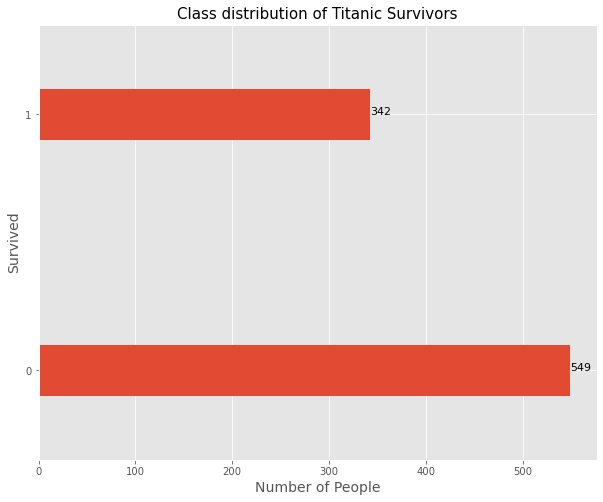

In [29]:
subplot = class_dist.groupby('Class') ['People'].sum().plot(kind='barh', width=0.2, figsize=(10,8))
subplot.set_title('Class distribution of Titanic Survivors', fontsize=15)
subplot.set_xlabel('Number of People', fontsize=14)
subplot.set_ylabel('Survived', fontsize=14)
for i in subplot.patches:
    subplot.text(i.get_width()+ 0.1, i.get_y()+ 0.1, str(i.get_width()), fontsize=11)

## Cleaning the data

In [30]:
#rebase the values
data.rename(columns={'Survived': 'Class'}, inplace=True)

In [31]:
mean_age = round(data['Age'].mean(), 0)

In [32]:
mean_age

30.0

In [33]:
data['Age'].fillna(mean_age, inplace=True)

In [34]:
data['Embarked'].fillna(method='ffill', inplace=True)

In [35]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [36]:
data.head()

,PassengerId,Class,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [37]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [38]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [39]:
data.isna().sum() # return all values that is not a number and sum em

PassengerId      0
Class            0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

## Split the dataset

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X= data[["Sex", "Embarked", "Pclass", "SibSp", "Parch"]]

In [42]:
X.head()

,Sex,Embarked,Pclass,SibSp,Parch
0,male,S,3,1,0
1,female,C,1,1,0
2,female,S,3,0,0
3,female,S,1,1,0
4,male,S,3,0,0


In [43]:
y = data['Class']

In [44]:
X_encoded = pd.get_dummies(X, prefix='dum', prefix_sep = '_', dtype=int)

In [45]:
X_encoded.shape

(891, 8)

In [46]:
X_encoded.head()

,Pclass,SibSp,Parch,dum_female,dum_male,dum_C,dum_Q,dum_S
0,3,1,0,0,1,0,0,1
1,1,1,0,1,0,1,0,0
2,3,0,0,1,0,0,0,1
3,1,1,0,1,0,0,0,1
4,3,0,0,0,1,0,0,1


In [47]:
X=X_encoded.iloc[:, 0:7].values.astype(int)

In [48]:
X

array([[3, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [3, 1, 2, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 1, 0],
       [3, 0, 0, ..., 1, 0, 1]])

In [49]:
y=data.iloc[:,1].values.astype(int)

In [50]:
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.seed(7))

In [52]:
X_train.shape

(712, 7)

In [53]:
X_test.shape

(179, 7)

In [54]:
179/(712+179) * 100

20.089786756453424

In [55]:
y_train.shape

(712,)

In [56]:
y_test.shape

(179,)

# Logistic Regression Model

In [57]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
from sklearn.linear_model import LogisticRegression
# !pip install wandb -qqq
import wandb
import time

In [58]:
# re-usable uttility function

In [59]:
def train_eval_pipeline(model, train_data, test_data, name):
    #initialize wandb and give proj a name
    wandb.init(project='ML for Analysis of Titanic Dataset', name=name)
    #assign the data
    (X_train, y_train) = train_data
    (X_test, y_test) = test_data
    
    #Train the model
    start = time.time()
    model.fit(X_train, y_train)
    end = time.time() - start
    prediction = model.predict(X_test)
    
    wandb.log({"accuracy": accuracy_score(y_test, prediction) * 100, "precision": precision_recall_fscore_support(y_test, prediction, average='macro')[0], "recall" : precision_recall_fscore_support(y_test, prediction, average='macro')[1], "training_time" : end})
    print("Accuracy of the Logistic Regression classifier with default hyperparameter values {0: .2f}%".format(accuracy_score(y_test, prediction)*100.))
    print("\n")
    print("---classification report of the Logistic Regression Classifier with default parameter values ---")
    print("\n")
    print(classification_report(y_test, prediction, target_names=["Survived", "Passed Away"]))

In [60]:
logreg = LogisticRegression()

In [61]:
logreg

LogisticRegression()

In [62]:
train_eval_pipeline(logreg, (X_train, y_train), (X_test, y_test), "Logistic_Regression_Titanic_Dataset")

wandb: Currently logged in as: austinmula (use `wandb login --relogin` to force relogin)


Accuracy of the Logistic Regression classifier with default hyperparameter values  73.74%


---classification report of the Logistic Regression Classifier with default parameter values ---


              precision    recall  f1-score   support

    Survived       0.76      0.83      0.79       110
 Passed Away       0.68      0.59      0.64        69

    accuracy                           0.74       179
   macro avg       0.72      0.71      0.72       179
weighted avg       0.73      0.74      0.73       179



## Hyperparametization

In [63]:
# GridSearchCV

In [64]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [65]:
# Define the grid of values

In [66]:
penalty = ["l1", "l2"]

In [67]:
C= uniform(loc=0, scale=4)

In [68]:
tol = [0.01, 0.001, 0.0001]

In [69]:
max_iter = [100, 150, 200, 250]

In [70]:
# Create a dict where tol and max_iter are keys and lists
# of their values are the corresponding values

In [71]:
param_grid = dict(penalty = penalty, C = C, tol = tol, max_iter = max_iter)

In [72]:
# we look for a set of hyperparameter values

In [73]:
# We instantiate RandomizedSearchCV with the required parameters


In [74]:
random_model = RandomizedSearchCV(estimator=logreg, param_distributions=param_grid, cv=5)

In [75]:
# fit model to the data

In [76]:
random_model_result = random_model.fit(X_train, y_train)

In [77]:
best_score, best_params = random_model_result.best_score_,random_model_result.best_params_

In [78]:
print('Best score: %.2f using %s'%(best_score* 100.,best_params))

Best score: 81.60 using {'C': 0.08629794150591108, 'max_iter': 250, 'penalty': 'l2', 'tol': 0.01}


Comments - best score is 81.60 which is an improvement

In [79]:
# Log results in wandb

In [80]:
config = wandb.config

In [81]:
config.tol = 0.01

In [82]:
config.penalty = "l2"

In [83]:
config.C = 0.08629794150591108

In [84]:
#Train the model

In [85]:
logreg = LogisticRegression(tol=config.tol, penalty = config.penalty, max_iter = 250, C = config.C)

In [86]:
logreg

LogisticRegression(C=0.08629794150591108, max_iter=250, tol=0.01)

In [87]:
train_eval_pipeline(logreg, (X_train, y_train), (X_test, y_test), "Logistic-Regression-Random-Search-Titanic")

accuracy,73.74302
precision,0.72402
recall,0.71074
training_time,0.01595


accuracy,▁
precision,▁
recall,▁
training_time,▁


Accuracy of the Logistic Regression classifier with default hyperparameter values  73.74%


---classification report of the Logistic Regression Classifier with default parameter values ---


              precision    recall  f1-score   support

    Survived       0.76      0.84      0.80       110
 Passed Away       0.69      0.58      0.63        69

    accuracy                           0.74       179
   macro avg       0.72      0.71      0.71       179
weighted avg       0.73      0.74      0.73       179

